# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 08 : Naive Bayes</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 1st Azar, 13:00 </font></h1>



# Step0: Import Libraries

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Step1: Load Data

In [144]:
iris = load_iris()

data = np.c_[iris.data, iris.target]

columns = np.append(iris.feature_names, ["target"])

df = pd.DataFrame(data, columns = columns)

# Step2: Data Overview

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# Step3: X, y

In [146]:
X = iris.data
y = iris.target
X
#np.matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Step4: Split the Data to Train & Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step5: Scaling

In [6]:
scaler = RobustScaler()

In [7]:
scaler = RobustScaler()scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Step6: Naive Bayes

## Creat the Model

In [8]:
gausian = GaussianNB()

## Train the Model

In [9]:
gausian.fit(X_train, y_train)

GaussianNB()

In [10]:
(gausian.sigma_).shape , X_train.shape

((3, 4), (120, 4))

##  Prediction & Evaluation
<hr>
print classification report

In [11]:
y_pred = gausian.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
accuracy_score(y_test, y_pred)

1.0

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

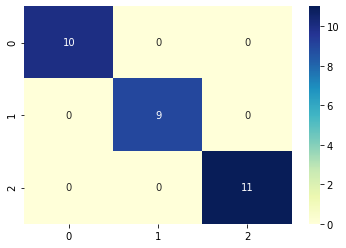

In [14]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Challenge

# Step1: Create Data

In [147]:
mu1 = [1, 1]
Sigma1 = [[1, 0], [0, 1]]
data1 = np.random.multivariate_normal(mu1, Sigma1, size=500)


In [148]:
mu2 = [3, 3]
Sigma2 = [[1, 0], [0, 1]]
data2 = np.random.multivariate_normal(mu2, Sigma2, size=500)


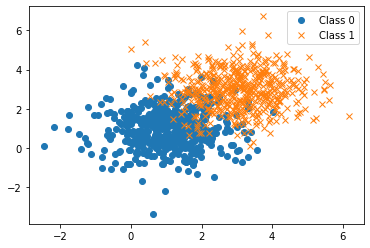

In [150]:
plt.plot(data1[:,0], data1[:,1], 'o', label="Class 0") 
plt.plot(data2[:,0], data2[:,1], 'x', label="Class 1")
plt.legend()
plt.show()

In [124]:
columns = np.append(["X1"], ["X2"])

df1 = pd.DataFrame(data1, columns=columns)

df1["target"] = 0 

X1 = df1.drop("target" , axis=1)

Y1 = df1["target"]

In [125]:

df2 = pd.DataFrame(data2, columns=columns) 

df2["target"] = 1 

X2 = df2.drop("target" , axis=1)

Y2 = df2["target"]

In [122]:
df = pd.concat([df1,df2]).reset_index()

df.drop("index" , axis=1 ,inplace=True)
df

,X1,X2,target
0,1.273153,1.046085,0
1,1.546694,1.897960,0
2,0.731511,1.241023,0
3,1.217355,-0.072964,0
4,2.127922,-0.844374,0
...,...,...,...
995,3.759274,3.808650,1
996,3.663007,4.339285,1
997,4.099446,2.939586,1
998,1.594461,4.635369,1


# Step2: Implementation of the model

In [117]:
def Calculate_Parameter(X):
    mu=0
    t1=0
    t2=0
    sigma=0
    
    m = X.shape[0]
    mu = (1/m) * X.sum()
    
    t1 = ((X-mu)**2).sum()
    
    t2 = ((X-mu).sum())**2
    
    sigma = (t1 - (t2/m)) / (m-1)
    
    return mu, sigma

In [126]:
Calculate_Parameter(X1)   

(X1    0.939224
 X2    1.056822
 dtype: float64,
 X1    1.007674
 X2    0.922877
 dtype: float64)

In [127]:
Calculate_Parameter(X2) 

(X1    3.000536
 X2    2.941462
 dtype: float64,
 X1    1.006559
 X2    1.032031
 dtype: float64)

In [128]:
def liklihood(x, c):
    mu, sigma = Calculate_Parameter(c)
    t1=0
    t2=0
    
    t1 = 1/(np.sqrt(2*np.pi*(sigma)))
    
    t2 = np.exp(-((x-mu)**2)/(2*sigma))
    
    L = np.array(t1) * np.array(t2)
    
    return L    

In [129]:
def prior(df, yc):
    m = df.shape[0]
    prior = yc.shape[0]/m
    
    return prior

# Step3: Predict test sample

In [130]:
x_new = [1.8,1.8]

In [131]:
def make_d(df, y1, y2, x_new, X1, X2):
    
    p1= prior(df, y1) * np.prod(liklihood(x_new, X1))
    
    p2= prior(df, y2) * np.prod(liklihood(x_new, X2))
    
    if p1>=p2:
        return 1
    
    elif p2>p1:
        return 0

In [133]:
make_d(df, Y1, Y2, x_new, X1, X2)

1

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>